In [2]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('C:/Users/nickk/OneDrive/Desktop/TPU/ProgrammingPython/Kursach/diabetes_binary_health_indicators_BRFSS2015.csv')
Selected_features = ['GenHlth' ,'CholCheck' ,'HighBP' ,'AnyHealthcare' ,'PhysActivity' ,'BMI' ,
'HighChol' ,'Age' ,'Fruits' ,'Income' ,'DiffWalk' ,'Education' ,'HeartDiseaseorAttack'
,'PhysHlth' , 'Smoker']
Target = 'Diabetes'

X = df[Selected_features]
y = df[Target]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.2)
cat  = CatBoostClassifier(verbose=0)
lgb = LGBMClassifier(verbose = -1)
xgb = XGBClassifier()
model = [('cat', cat), ('lgb', lgb), ('xgb', xgb)]

clf = VotingClassifier(model , voting='soft' , n_jobs = -1)
clf.fit(X_train , y_train)


VotingClassifier(estimators=[('cat',
                              <catboost.core.CatBoostClassifier object at 0x000001948D3096D0>),
                             ('lgb', LGBMClassifier(verbose=-1)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feat...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 n_jobs=-1, voting='soft')

In [3]:
y_probs = clf.predict_proba(X_test)

# The Area Under the Precision-Recall Curve (AUPRC) is used to evaluate the performance of a binary classification model, especially when dealing with imbalanced datasets

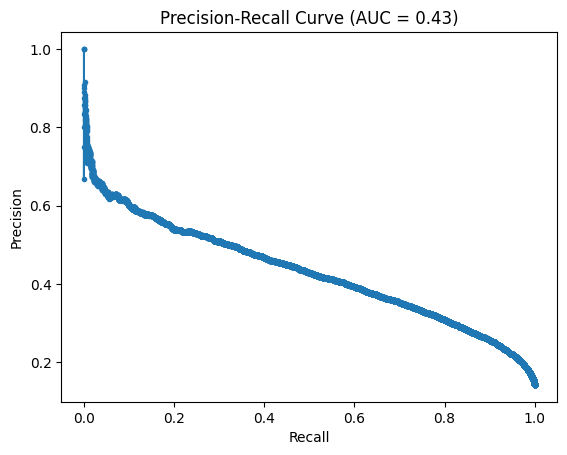

In [4]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

y_probs_positive_class = y_probs[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_probs_positive_class)

auprc = auc(recall, precision)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AUC = {auprc:.2f})')
plt.show()